In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Unemployment in India.csv")
df.head() 

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [14]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [17]:
print("Dataset Shape: ", df.shape)
print()

columns = df.columns.to_list()
print("Columns: ", columns)

print()
print(df.describe(include='object'))

print()
print("Missing values: ") 
print(df.isnull().sum())

print()
print("Datatypes: ")
print(df.dtypes)

Dataset Shape:  (768, 7)

Columns:  ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']

                Region         Date  Frequency   Area
count              740          740        740    740
unique              28           14          2      2
top     Andhra Pradesh   31-10-2019    Monthly  Urban
freq                28           55        381    381

Missing values: 
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

Datatypes: 
Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemploy

In [22]:
mean_values = df.mean()
print("Mean:")
print(mean_values)

print()
median_values = df.median()
print("Median:")
print(median_values)

print()
std_values = df.std()
print("Standard Deviation:")
print(std_values)

Mean:
 Estimated Unemployment Rate (%)            1.178795e+01
 Estimated Employed                         7.204460e+06
 Estimated Labour Participation Rate (%)    4.263012e+01
dtype: float64

Median:
 Estimated Unemployment Rate (%)                  8.35
 Estimated Employed                         4744178.50
 Estimated Labour Participation Rate (%)         41.16
dtype: float64

Standard Deviation:
 Estimated Unemployment Rate (%)            1.072130e+01
 Estimated Employed                         8.087988e+06
 Estimated Labour Participation Rate (%)    8.111094e+00
dtype: float64


<ipython-input-22-32813dc7bc74>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()
<ipython-input-22-32813dc7bc74>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df.median()
<ipython-input-22-32813dc7bc74>:11: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_val

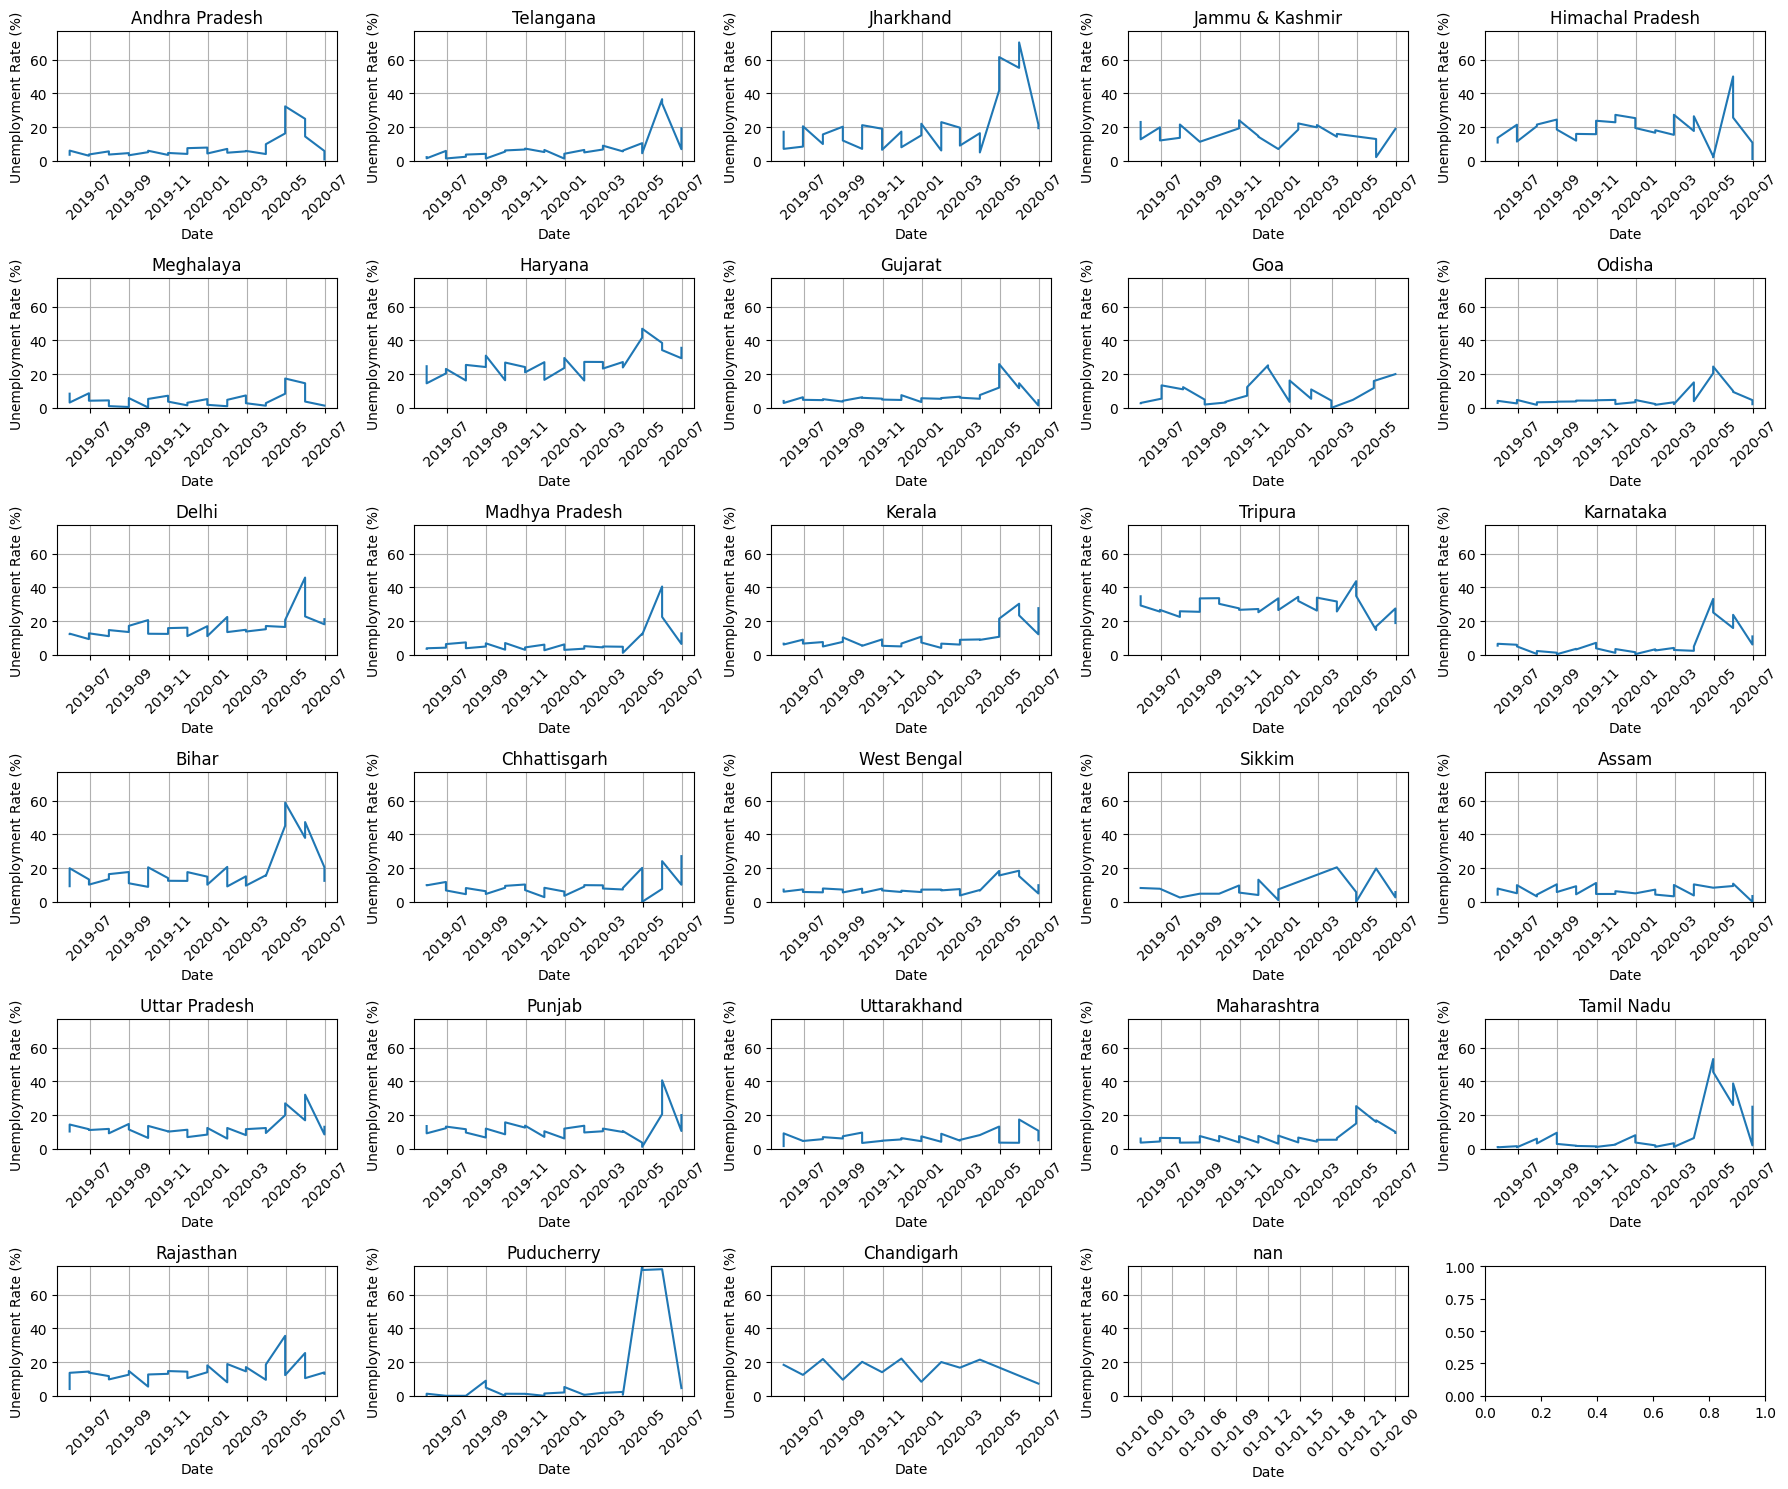

In [47]:
df[' Date'] = pd.to_datetime(df[' Date'])

df.sort_values(' Date', inplace=True)

regions = df['Region'].unique()

num_plots = len(regions)
num_rows = 6
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 15))

y_min = df[' Estimated Unemployment Rate (%)'].min()
y_max = df[' Estimated Unemployment Rate (%)'].max()

for i, region in enumerate(regions):
    ax = axs[i // num_cols, i % num_cols]  
    region_df = df[df['Region'] == region]
    ax.plot(region_df[' Date'], region_df[' Estimated Unemployment Rate (%)'])
    ax.set_title(region)
    ax.set_xlabel('Date')
    ax.set_ylabel('Unemployment Rate (%)')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()

plt.show()

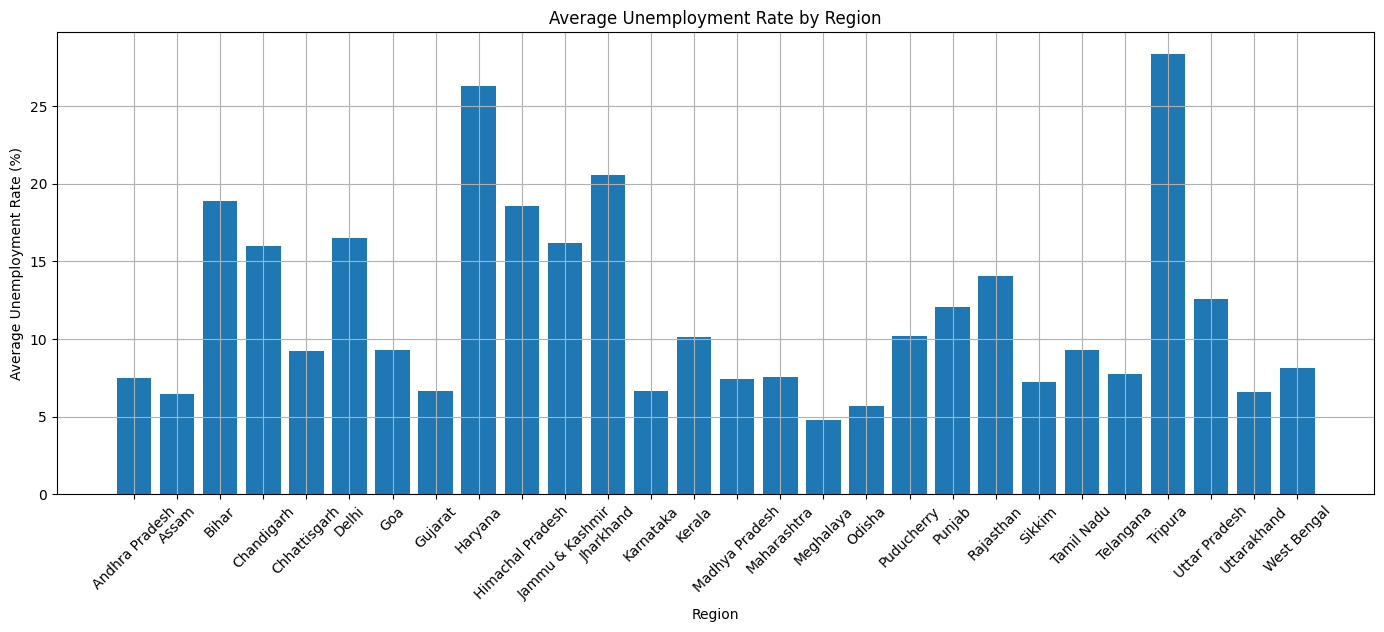

In [46]:
average_rate_by_region = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(17, 6))
plt.bar(average_rate_by_region['Region'], average_rate_by_region[' Estimated Unemployment Rate (%)'])
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

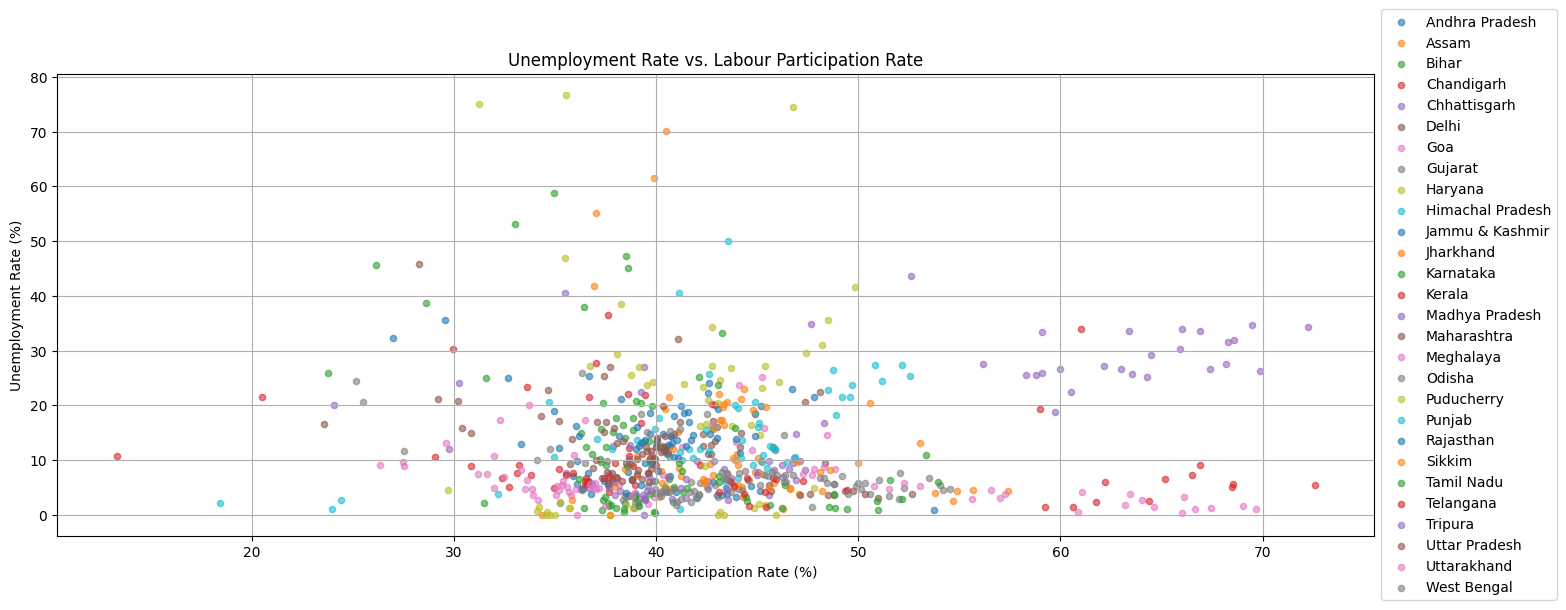

In [54]:
plt.figure(figsize=(17, 6))
for region, region_df in df.groupby('Region'):
    plt.scatter(region_df[' Estimated Labour Participation Rate (%)'], region_df[' Estimated Unemployment Rate (%)'], label=region, alpha=0.6, s=20)
plt.title('Unemployment Rate vs. Labour Participation Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

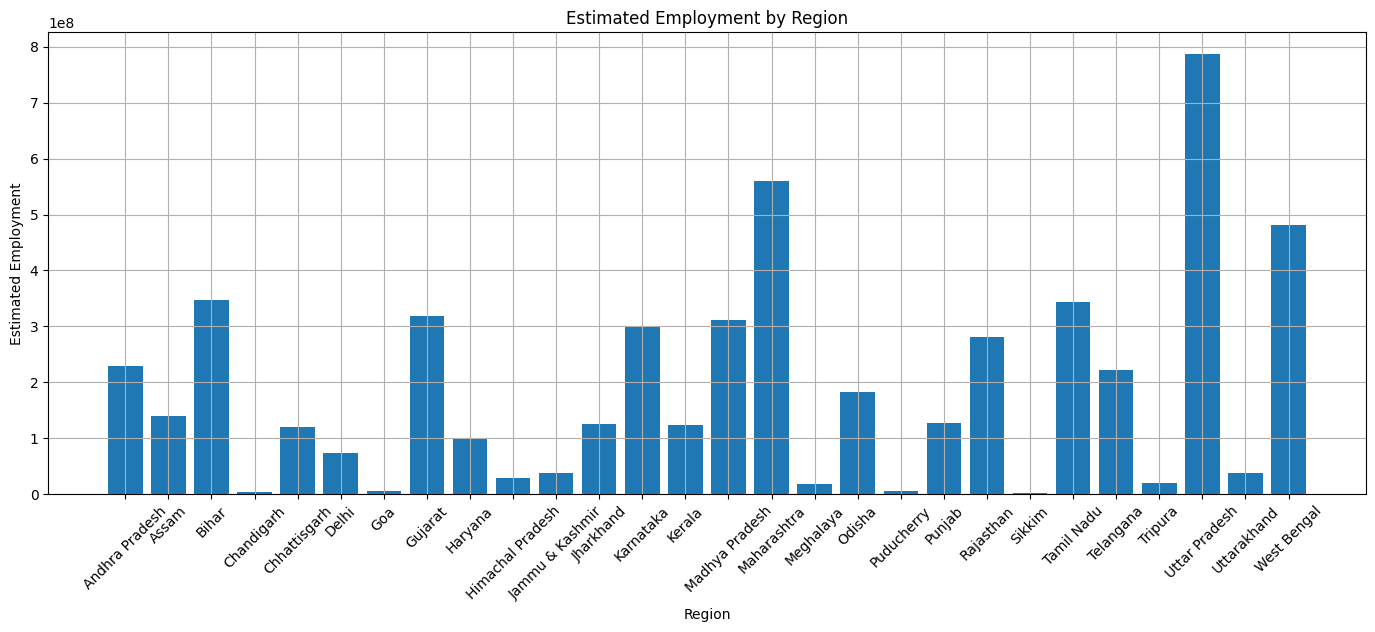

In [56]:
employed_by_region = df.groupby('Region')[' Estimated Employed'].sum().reset_index()

plt.figure(figsize=(17, 6))
plt.bar(employed_by_region['Region'], employed_by_region[' Estimated Employed'])
plt.title('Estimated Employment by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Employment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

ValueError: ignored

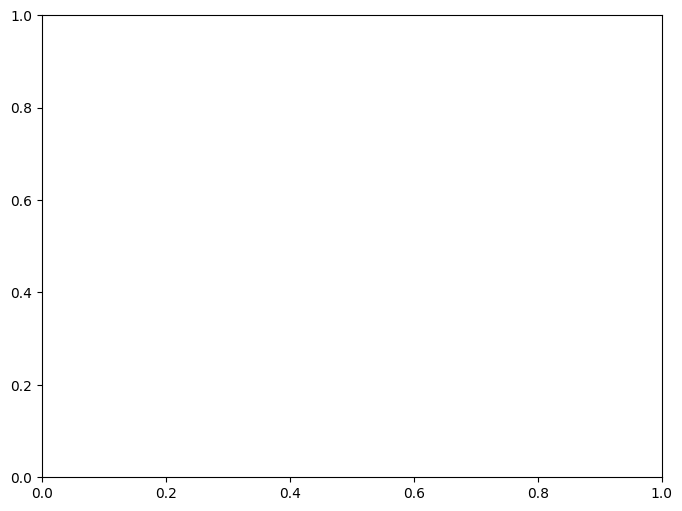

In [59]:
plt.figure(figsize=(8, 6))

data = [list(group[' Estimated Unemployment Rate (%)']) for _, group in df.groupby(' Frequency')]
labels = df[' Frequency'].unique()

plt.boxplot(data, labels=labels)
plt.title('Distribution of Unemployment Rates by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()